In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import random
import math

In [19]:
centroids = [(-5, -5), (5, 5), (-2.5, 2.5)]
cluster_std_dev = (1, 1, 1)

X, y = make_blobs(n_samples=100, cluster_std=cluster_std_dev, centers=centroids, n_features=2, random_state=2)

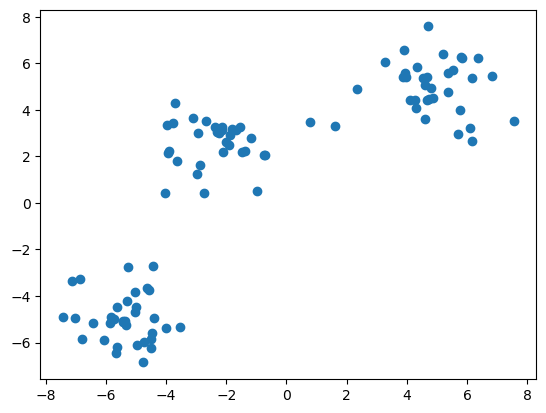

In [20]:
plt.scatter(X[:,0], X[:,1])

In [38]:
class KMeans:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
    def fit_predict(self, X):
        random_index = random.sample(range(0, X.shape[0]), self.n_clusters)
        self.centroids = X[random_index]
        
        for i in range(self.max_iter):
            old_centroids = self.centroids
            cluster_group = self.assign_clusters(X)
            self.centroids = self.move_centroids(X, cluster_group)            
            if (self.centroids == old_centroids).all():
                break

        return cluster_group
        
    def assign_clusters(self, X):
        cluster_group = list()
        
        for point in X:
            min_dist = float("inf")
            assigned_centroid = None
            
            for ind, centroid in enumerate(self.centroids):
                dist = self.dist(point, centroid)
                if dist < min_dist:
                    min_dist = dist
                    assigned_centroid_ind = ind
            cluster_group.append(assigned_centroid_ind)
        return np.array(cluster_group)

    @staticmethod
    def dist(x, y):
        return np.sqrt(np.dot(x-y, x-y))

    def move_centroids(self, X, cluster_group):
        new_centroids = list()
        cluster_type = np.unique(cluster_group)

        for ctype in cluster_type:
            new_centroids.append(X[cluster_group == ctype].mean(axis=0))

        return np.array(new_centroids)

    # Within-Cluster Sum of Squares (WCSS).
    def WCSS(self, X, cluster_group):
        cluster_type = np.unique(cluster_group)
        wcss = 0

        for row, cluster in zip(X, cluster_group):
            wcss += self.dist(row, self.centroids[cluster]) ** 2

        return wcss

In [39]:
kMeans = KMeans(n_clusters=3, max_iter=100)
y_means = kMeans.fit_predict(X)

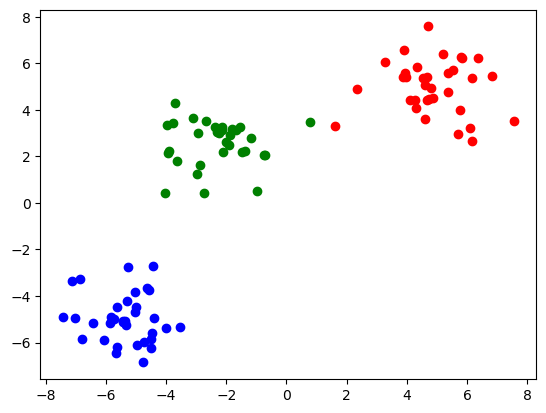

In [40]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], color='red')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], color='blue')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], color='green')
plt.show()

The Elbow Method is a technique used to find the optimal number of clusters in KMeans Clustering.  
Steps: 
1. We iterate over a range of k values, typically from 1 to n (where n is a hyper-parameter you choose).
2. For each k, we calculate the Within-Cluster Sum of Squares (WCSS).  

Identifying the Elbow Point: As we increase k, the WCSS typically decreases because we're creating more clusters, which tend to capture more data variations. However, there comes a point where adding more clusters results in only a marginal decrease in WCSS. This is where we observe an "elbow" shape in the graph.  
• Before the elbow: Increasing kkk significantly reduces WCSS, indicating that new clusters effectively capture more of the data's variability.  
• After the elbow: Adding more clusters results in a minimal reduction in WCSS, suggesting that these extra clusters may not be necessary and could lead to overfitting.

k = 1, WCSS = 3928.441215668428
k = 2, WCSS = 1162.4943235390974
k = 3, WCSS = 223.44790489844445
k = 4, WCSS = 199.6716004759117
k = 5, WCSS = 175.0655918370206
k = 6, WCSS = 160.23663506408062
k = 7, WCSS = 139.47392272567086
k = 8, WCSS = 118.42331618711432
k = 9, WCSS = 127.20786990909093
k = 10, WCSS = 95.31758803241712


[]

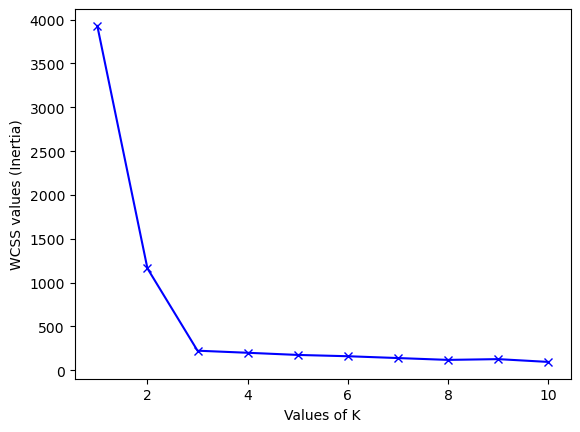

In [41]:
wcss = []
n = 11
for i in range(1, n):
    kMeans = KMeans(n_clusters=i, max_iter=200)
    y_means = kMeans.fit_predict(X)
    wcss.append(kMeans.WCSS(X, y_means))
    print(f"k = {i}, WCSS = {wcss[-1]}")

plt.plot(range(1, n), wcss, 'bx-')
plt.xlabel("Values of K")
plt.ylabel("WCSS values (Inertia)")
plt.plot()